In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
# from skopt import BayesSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
data = pd.read_csv('data/main_data.csv')
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1.0,0.070352,0.382893,0.333333,0.5,1.0,0.00,0.572650,0.209396,0.262411,0.25
1,1.0,0.056952,0.315788,0.333333,0.5,1.0,0.50,0.474359,0.293289,0.365248,0.25
2,0.6,0.021441,0.368419,1.000000,0.5,1.0,1.00,0.329060,0.292953,0.276596,0.25
3,0.8,0.032663,0.334209,0.333333,0.5,1.0,0.00,0.555556,0.259060,0.319149,0.25
4,0.6,0.016751,0.315788,1.000000,0.5,1.0,0.00,0.260684,0.226174,0.312057,0.25
...,...,...,...,...,...,...,...,...,...,...,...
8111,0.8,0.048576,0.289472,1.000000,0.5,1.0,0.00,0.363248,0.192282,0.290780,0.25
8112,0.6,0.017588,0.313156,0.333333,0.5,1.0,0.25,0.290598,0.291611,0.390071,0.25
8113,0.8,0.058962,0.315788,0.333333,0.5,1.0,0.00,0.397436,0.209396,0.258865,0.25
8114,0.8,0.043551,0.065787,0.333333,0.5,1.0,0.00,0.576923,0.259060,0.248227,0.25


In [4]:
X = data[['max_power']]
y = data.selling_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R2 : {r2_score(y_pred, y_test)}')
print(f'MSE : {mean_squared_error(y_pred, y_test)}')

R2 : 0.2104479364774814
MSE : 0.007551289517200982


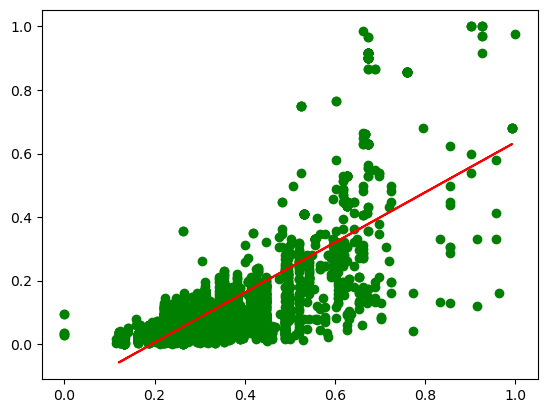

In [19]:
plt.scatter(X_train[:, 1], y_train, color='green')
plt.plot(X_test[:, 1], y_pred, color='red')
plt.show()

In [49]:
X = data[['mileage', 'max_power']]
y = data.selling_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R2 : {r2_score(y_pred, y_test)}')
print(f'MSE : {mean_squared_error(y_pred, y_test)}')

R2 : 0.30648451333516535
MSE : 0.007021588094854208


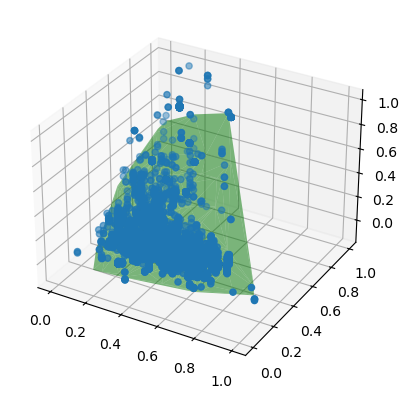

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,1], X_train[:,2], y_train)
ax.plot_trisurf(X_test[:, 1], X_test[:, 2], y_pred, color='g', alpha=0.5)

In [61]:
X = data[['max_power']]
y = data.selling_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

random_search = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions={
        'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    },
    scoring='r2',
    cv=5,
    n_iter=3
)

random_search.fit(X_train, y_train)
print(f"Best Parameters : {random_search.best_params_}")
print(f"Best R2 Score : {random_search.best_score_}")

model = Lasso(alpha=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R2 : {r2_score(y_pred, y_test)}')
print(f'MSE : {mean_squared_error(y_pred, y_test)}')

Best Parameters : {'alpha': 0.4}
Best R2 Score : 0.5516333069165482
R2 : -1.0248963642884604e+31
MSE : 0.017764907380890795


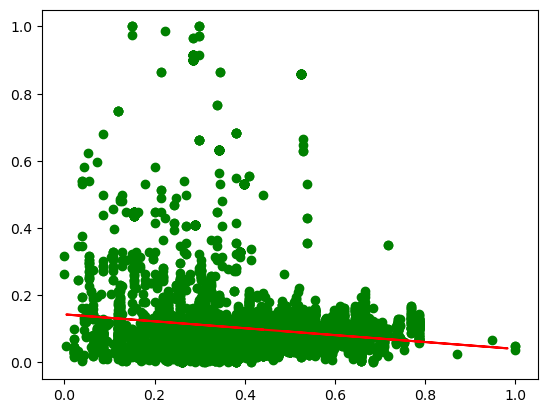

In [123]:
plt.scatter(X_train[:, 1], y_train, color='green')
plt.plot(X_test[:, 1], y_pred, color='red')
plt.show()

In [121]:
X = data[['mileage']]
y = data.selling_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

random_search = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions={
        'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
                   1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
                   2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
                   4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]
    },
    scoring='r2',
    cv=5,
    n_iter=3
)

random_search.fit(X_train, y_train)
print(f"Best Parameters : {random_search.best_params_}")
print(f"Best R2 Score : {random_search.best_score_}")

model = Ridge(alpha=2.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R2 : {r2_score(y_pred, y_test)}')
print(f'MSE : {mean_squared_error(y_pred, y_test)}')

Best Parameters : {'alpha': 1.7}
Best R2 Score : 0.016512014375773078
R2 : -60.43982153155644
MSE : 0.017524736317620405


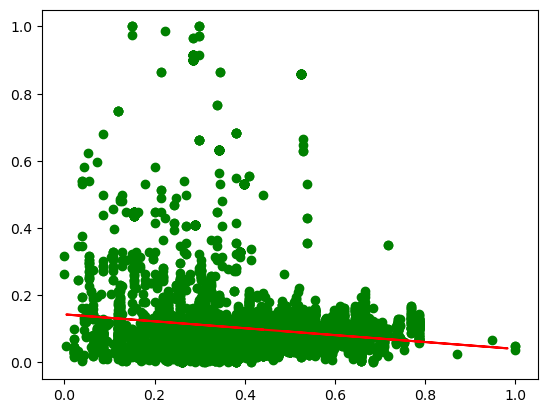

In [125]:
plt.scatter(X_train[:, 1], y_train, color='green')
plt.plot(X_test[:, 1], y_pred, color='red')
plt.show()

In [131]:
X = data[['mileage']]
y = data.selling_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

grid_search = GridSearchCV(
    estimator=ElasticNet(),
    param_grid={
        'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    },
    scoring='r2',
    cv=5
)
grid_search.fit(X_train,y_train)
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best R2 Score : {grid_search.best_score_}")

model = ElasticNet(alpha=0.1, l1_ratio=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R2 : {r2_score(y_pred, y_test)}')
print(f'MSE : {mean_squared_error(y_pred, y_test)}')

Best Parameters : {'alpha': 0.1, 'l1_ratio': 0.1}
Best R2 Score : -0.00041007128194117117
R2 : -1.0248963642884604e+31
MSE : 0.017764907380890795


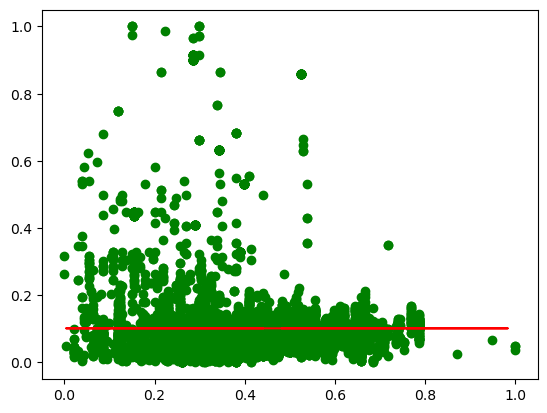

In [133]:
plt.scatter(X_train[:, 1], y_train, color='green')
plt.plot(X_test[:, 1], y_pred, color='red')
plt.show()